<a href="https://colab.research.google.com/github/Pranov1984/CNN_TransferLearning_Mammal_Classification/blob/main/Transfer_Learning_4_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage import data, io
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

## Image Path

In [ ]:
images_path = "/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/4class.zip"

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile
with ZipFile(images_path, 'r') as zip:
  zip.extractall()

In [ ]:
!ls

4class	gdrive	sample_data


What are the folder names which constitute the data for training

In [ ]:
os.listdir('./4class')

['dogs', 'cats', 'humans', 'horses']

## How many images are present in each of the four folders which constitute our classes to train the model on 

In [ ]:
len(os.listdir('./4class/dogs')) , len(os.listdir('./4class/cats')), len(os.listdir('./4class/humans')), len(os.listdir('./4class/horses'))

(25, 25, 25, 25)

## Check 2 image names in each of the folders

In [ ]:
os.listdir('./4class/dogs')[0:2] ,os.listdir('./4class/cats')[0:2], os.listdir('./4class/humans')[0:2], os.listdir('./4class/horses')[0:2]

(['dog.25.jpg', 'dog.19.jpg'],
 ['cat.7.jpg', 'cat.6.jpg'],
 ['rider-19.jpg', 'rider-21.jpg'],
 ['horse-24.jpg', 'horse-17.jpg'])

In [ ]:
dog_dir = os.listdir('./4class/dogs')
cat_dir = os.listdir('./4class/cats')
rider_dir = os.listdir('./4class/humans')
horse_dir = os.listdir('./4class/horses')

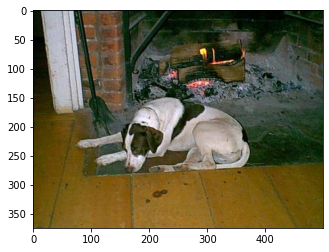

In [ ]:
img = io.imread(os.path.join('./4class/dogs/dog.25.jpg'))
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(375, 499, 3)

In [ ]:
PATH = ('./4class/')

In [ ]:
# Define data path for the folders

dog_path = os.path.join(PATH,'dogs')
cat_dir = os.path.join(PATH,'cats')
rider_dir = os.path.join(PATH,'humans')
horse_dir = os.path.join(PATH,'horses')

In [ ]:
for f in os.listdir(PATH):
    print("Total training  images of {fname} is: {count}"
          .format(fname = f, count = len(os.listdir(PATH +'/'+f))))

Total training  images of dogs is: 25
Total training  images of cats is: 25
Total training  images of humans is: 25
Total training  images of horses is: 25


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x4 configuration
nrows = 10
ncols = 4

# Index for iterating over images
pic_index = 0

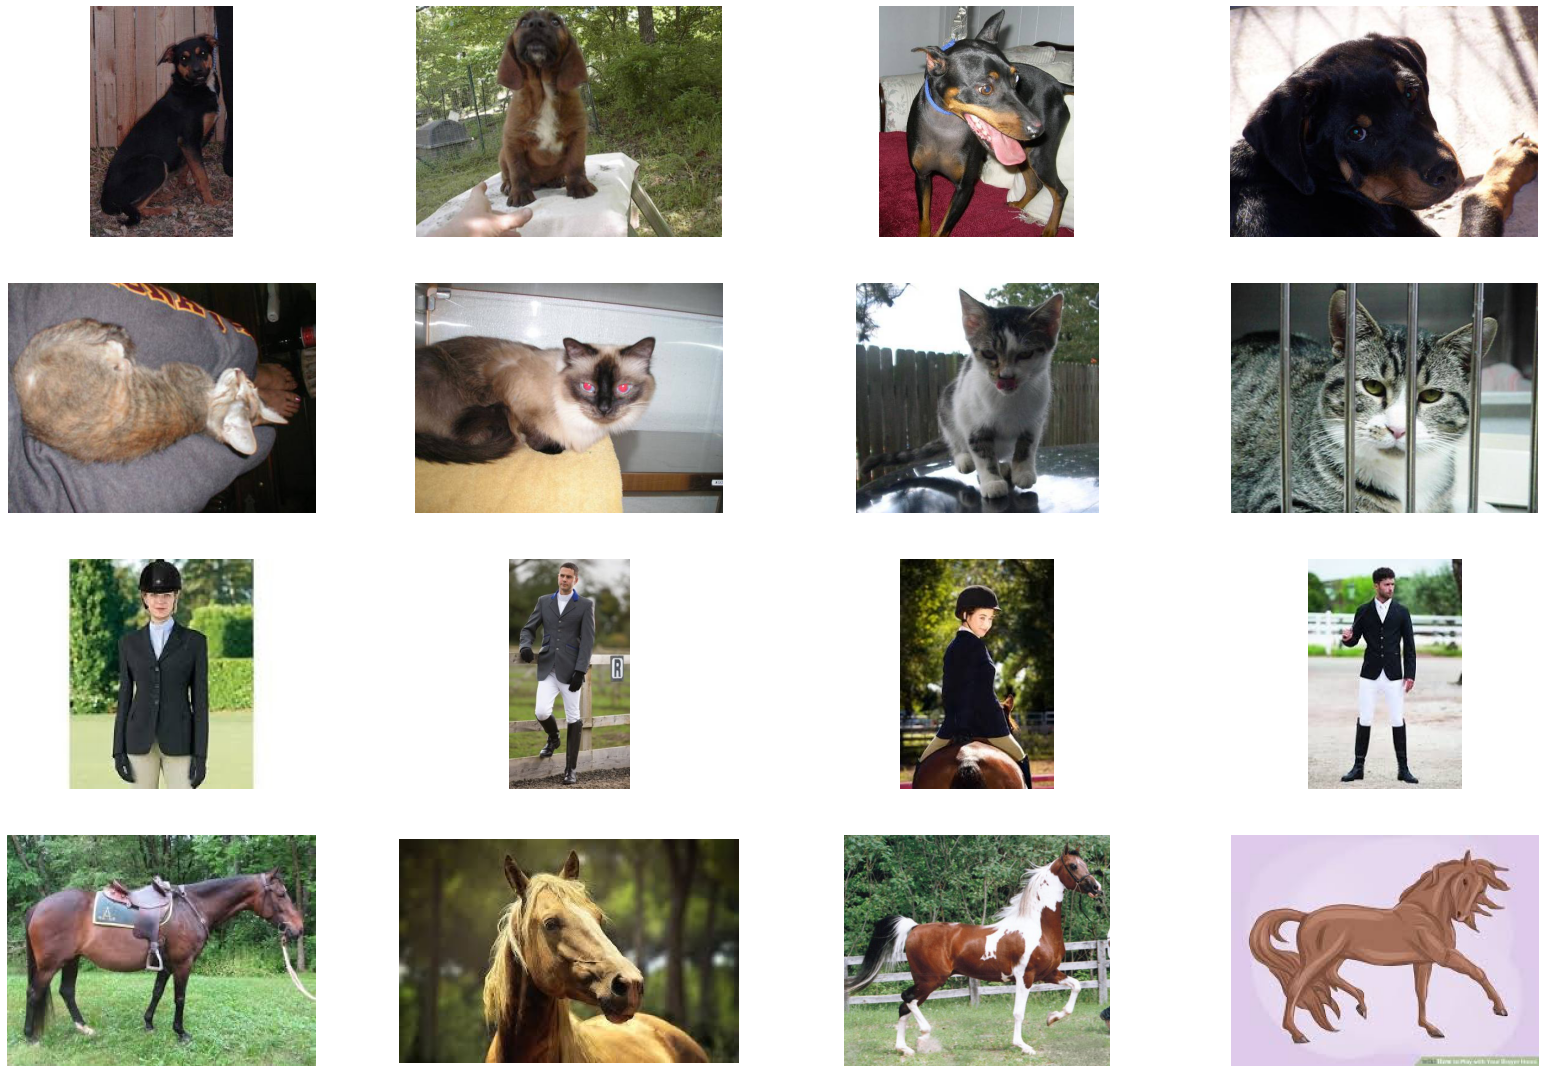

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 7, nrows * 5)

pic_index += 5
next_dogs_pix = [os.path.join(PATH + 'dogs', fname) 
                for fname in os.listdir(PATH +'dogs')[pic_index-4:pic_index]]
next_cats_pix = [os.path.join(PATH+'/cats', fname) 
                for fname in os.listdir(PATH+'/cats')[pic_index-4:pic_index]]
next_humans_pix = [os.path.join(PATH +'/humans', fname) 
                for fname in os.listdir(PATH+'/humans')[pic_index-4:pic_index]]
next_horses_pix = [os.path.join(PATH+'/horses', fname) 
                for fname in os.listdir(PATH+'/horses')[pic_index-4:pic_index]]

for i, img_path in enumerate(next_dogs_pix+next_cats_pix+next_humans_pix+next_horses_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import numpy as np
import os
import time
from keras.applications import ResNet50
from keras.applications import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image

from keras.applications.imagenet_utils import preprocess_input    ### this helps in converting our images to the dimensions of classifiers used to train imagenet images
from keras.applications.imagenet_utils import decode_predictions  ### this helps in decode predictions to human readable class
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from keras import optimizers

In [ ]:
model = VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Use the model above to classify any image from the data

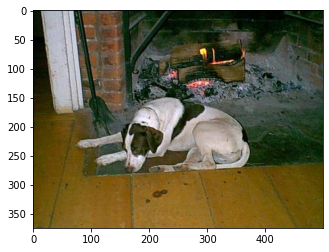

(375, 499, 3)

In [ ]:
img = io.imread(os.path.join('./4class/dogs/dog.25.jpg'))
plt.imshow(img)
plt.show()
img.shape

# Preprocess the image dimension to the shape/dimension of input shape for vgg16 or resnet or any model that was used on image net data.

We need to do this since we will use those models for our custom classification

In [ ]:
img = image.load_img(os.path.join('./4class/dogs/dog.25.jpg'), target_size=(224,224))
x = image.img_to_array(img)

In [ ]:
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)

x=preprocess_input(x)
x.shape

(224, 224, 3)
(1, 224, 224, 3)


(1, 224, 224, 3)

In [ ]:
print(x)

[[[[-103.939      -93.779     -122.68     ]
   [-100.939      -91.779     -117.68     ]
   [ -93.939      -87.779     -111.68     ]
   ...
   [ -89.939      -82.779     -102.68     ]
   [-100.939      -93.779     -112.68     ]
   [ -99.939      -90.779     -121.68     ]]

  [[-101.939      -92.779     -118.68     ]
   [-102.939      -93.779     -118.68     ]
   [ -97.939      -91.779     -113.68     ]
   ...
   [ -94.939      -86.779     -108.68     ]
   [-100.939      -92.779     -114.68     ]
   [ -98.939      -93.779     -113.68     ]]

  [[-103.939      -95.779     -117.68     ]
   [-102.939      -95.779     -115.68     ]
   [ -99.939      -95.779     -113.68     ]
   ...
   [ -88.939      -78.779     -107.68     ]
   [ -96.939      -87.779     -113.68     ]
   [ -97.939      -95.779     -106.68     ]]

  ...

  [[ -91.939      -36.779      -20.68     ]
   [ -91.939      -31.779      -10.68     ]
   [ -85.939      -25.779       -4.6800003]
   ...
   [ -96.939      -29.779      -25.

In [ ]:
features = model.predict(x)
print("Predicted Class is" , decode_predictions(features, 2))

Predicted Class is [[('n02091134', 'whippet', 0.45145917), ('n02093428', 'American_Staffordshire_terrier', 0.15609573)]]


# The top 2 predictions are two types of dog breeds meaning the prediction seems to be accurate

## Include top means it downloads all layers and weights including the last dense layer i.e. classification layer.

### If we say include_top = False, we will not download the last year or the classification layer 

In [ ]:
model2 = ResNet50(include_top=True)
model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
features = model2.predict(x)
print("Predicted Class is" , decode_predictions(features, 2))

Predicted Class is [[('n02091134', 'whippet', 0.26135933), ('n02092339', 'Weimaraner', 0.24455993)]]


## Still similar output with the second prediction being differnt

## Prepare for converting the images to arrays for pushing into models for training

In [ ]:
PATH
PATH_dir = os.listdir(PATH)
print(PATH_dir , PATH)

['dogs', 'cats', 'humans', 'horses'] ./4class/


In [ ]:
img_data_list = []

for dataset in os.listdir(PATH):
  img_list = os.listdir(PATH + "/" + dataset)
  for img in img_list:
    img_path = PATH + dataset+'/'+img
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x= preprocess_input(x)
    img_data_list.append(x)
    

img_data = np.array(img_data_list)

In [ ]:
print(img_data.shape)

(100, 1, 224, 224, 3)


## Save the features for future use as features directly for training/prediction

In [ ]:
np.save('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/train_data.npy', img_data)


## Load the saved the training data and labels

In [ ]:
img_data = np.load('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/train_data.npy')

#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(100, 1, 224, 224, 3)
(1, 100, 224, 224, 3)
(100, 224, 224, 3)


In [ ]:
labels = np.ones(img_data.shape[0],dtype='int64')

# Define the number of classes
num_classes = 4
num_of_samples = img_data.shape[0]

labels[0:25] = 0
labels[25:50] = 1
labels[50:75] = 2
labels[75:100] = 3

names = ['dogs' , 'cats', 'riders', 'horses']

In [ ]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)  

## Train a CNN from scratch

In [ ]:
classifier = Sequential()

classifier.add(Convolution2D(32,(3,3), input_shape=(224,224,3), activation='relu', padding='same'))
classifier.add(MaxPool2D(pool_size=(3,3)))

classifier.add(Convolution2D(64,(3,3), activation='relu', padding='same'))
classifier.add(MaxPool2D(pool_size=(3,3)))


classifier.add(Convolution2D(32,(2,2), activation='relu', padding='same'))
classifier.add(MaxPool2D(pool_size=(2,2)))


classifier.add(Flatten())
classifier.add(Dropout(0.3))

classifier.add(Dense(512, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(128, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.1))

classifier.add(Dense(4, activation='softmax'))

print(classifier.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        8224      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

In [ ]:
optimizer=optimizers.Adam(lr=0.01)
classifier.compile(optimizer=optimizer, loss='categorical_crossentropy' , metrics=['accuracy'])

hist = classifier.fit(X_train, y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
1/1 [==============================] - 1s 510ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 74.4016 - val_accuracy: 0.1500
Epoch 2/20
1/1 [==============================] - 0s 315ms/step - loss: 2.0114 - accuracy: 0.5750 - val_loss: 87.4359 - val_accuracy: 0.3000
Epoch 3/20
1/1 [==============================] - 0s 299ms/step - loss: 1.8973 - accuracy: 0.4625 - val_loss: 103.9945 - val_accuracy: 0.3000
Epoch 4/20
1/1 [==============================] - 0s 300ms/step - loss: 0.7427 - accuracy: 0.7125 - val_loss: 84.8189 - val_accuracy: 0.3000
Epoch 5/20
1/1 [==============================] - 0s 309ms/step - loss: 0.4272 - accuracy: 0.8000 - val_loss: 123.2126 - val_accuracy: 0.3000
Epoch 6/20
1/1 [==============================] - 0s 304ms/step - loss: 0.6039 - accuracy: 0.7375 - val_loss: 150.2643 - val_accuracy: 0.3000
Epoch 7/20
1/1 [==============================] - 0s 302ms/step - loss: 0.5216 - accuracy: 0.7750 - val_loss: 153.0605 - val_accuracy: 0.3000
Epoch 8/2

## Not great result

## Transfer Learning using the resnet model already imported

### No fine-tuning

In [ ]:
from keras.models import Input
image_input = Input(shape=(224,224,3))

In [ ]:
model2 = ResNet50(input_tensor=image_input, include_top=True, weights='imagenet')

last_layer = model2.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)

In [ ]:
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

Model: "functional_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
for layer in custom_resnet_model.layers[:-1]:
	layer.trainable = False

In [ ]:
custom_resnet_model.layers[-1].trainable

True

In [ ]:
custom_resnet_model.layers[-2].trainable

False

In [ ]:
custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
t=time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/12
3/3 [==============================] - 11s 4s/step - loss: 1.9469 - accuracy: 0.3250 - val_loss: 0.9553 - val_accuracy: 0.7000
Epoch 2/12
3/3 [==============================] - 10s 3s/step - loss: 1.2049 - accuracy: 0.4250 - val_loss: 0.6715 - val_accuracy: 0.8500
Epoch 3/12
3/3 [==============================] - 10s 3s/step - loss: 0.6444 - accuracy: 0.7375 - val_loss: 0.5065 - val_accuracy: 0.8000
Epoch 4/12
3/3 [==============================] - 10s 3s/step - loss: 0.2963 - accuracy: 0.9625 - val_loss: 0.5148 - val_accuracy: 0.7500
Epoch 5/12
3/3 [==============================] - 10s 3s/step - loss: 0.1987 - accuracy: 0.9750 - val_loss: 0.4833 - val_accuracy: 0.7500
Epoch 6/12
3/3 [==============================] - 10s 3s/step - loss: 0.1289 - accuracy: 0.9875 - val_loss: 0.3931 - val_accuracy: 0.7500
Epoch 7/12
3/3 [==============================] - 10s 3s/step - loss: 0.0749 - accuracy: 1.0000 - val_loss: 0.3219 - val_accuracy: 0.8500
Epoch 8/12
3/3 [==================

In [ ]:
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

2/2 [==============================] - 2s 800ms/step - loss: 0.2036 - accuracy: 0.9000


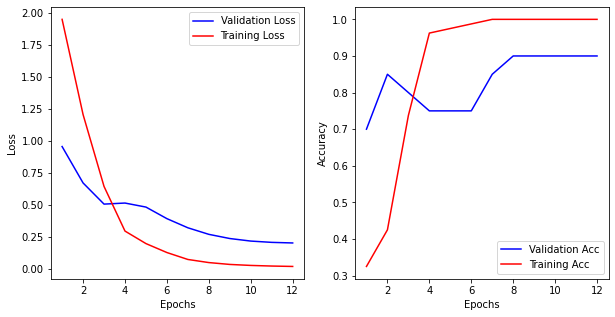

In [ ]:
model_val_loss = hist.history['val_loss']
model_train_loss = hist.history['loss']
model_val_acc = hist.history['val_accuracy']
model_train_acc = hist.history['accuracy']

epochs = range(1,13)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Try another version, i.e a few intermediary dense layers and fine tune it. In the previous iteration we just added our last layer i.e. the classifier layer and trained the model


In [ ]:
# Fine tune the resnet 50
#image_input = Input(shape=(224, 224, 3))
model = ResNet50(weights='imagenet',include_top=False)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
# a softmax layer for 4 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

In [ ]:
# this is the model we will train
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

custom_resnet_model2.summary()

Model: "functional_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

## Set the Resnet layers as false for training. Only the 6 layers we added are to be finetuned and/or trained

In [ ]:
for layer in custom_resnet_model2.layers[:-6]:
	layer.trainable = False

custom_resnet_model2.layers[-6].trainable

True

In [ ]:
custom_resnet_model2.layers[-6].trainable, custom_resnet_model2.layers[-7].trainable

(True, False)

In [ ]:
custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/12
3/3 [==============================] - 11s 4s/step - loss: 1.9872 - accuracy: 0.3000 - val_loss: 1.4644 - val_accuracy: 0.6500
Epoch 2/12
3/3 [==============================] - 10s 3s/step - loss: 0.8726 - accuracy: 0.6625 - val_loss: 0.4308 - val_accuracy: 0.8500
Epoch 3/12
3/3 [==============================] - 10s 3s/step - loss: 0.4416 - accuracy: 0.8375 - val_loss: 0.2677 - val_accuracy: 0.9000
Epoch 4/12
3/3 [==============================] - 10s 3s/step - loss: 0.3724 - accuracy: 0.8625 - val_loss: 0.4172 - val_accuracy: 0.8500
Epoch 5/12
3/3 [==============================] - 10s 3s/step - loss: 0.1133 - accuracy: 0.9375 - val_loss: 0.7839 - val_accuracy: 0.7500
Epoch 6/12
3/3 [==============================] - 10s 3s/step - loss: 0.2962 - accuracy: 0.9000 - val_loss: 0.3013 - val_accuracy: 0.9000
Epoch 7/12
3/3 [==============================] - 10s 3s/step - loss: 0.1156 - accuracy: 0.9500 - val_loss: 0.0819 - val_accuracy: 1.0000
Epoch 8/12
3/3 [==================

## Near 100% accuracy. Let use this model to predict a few unseen images

## Vizualizing Test Predictions

In [ ]:
img = image.load_img(os.path.join('./4class/dogs/dog.25.jpg'), target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [ ]:
x=preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [ ]:
features = custom_resnet_model2.predict(x)
print( "Actual class is: ",np.argmax(features))

Actual class is:  0


# We 0 is the encoded value for Dog. So this is the correct prediction

In [ ]:
img = image.load_img('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/Predict_new_Images/popo99.jpg', target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x=preprocess_input(x)
x.shape

(224, 224, 3)
(1, 224, 224, 3)


(1, 224, 224, 3)

In [ ]:
features = custom_resnet_model2.predict(x)
print( "Actual class is: ",np.argmax(features))

Actual class is:  2


# Class 2 is for humans. Let's visualize the image and validate

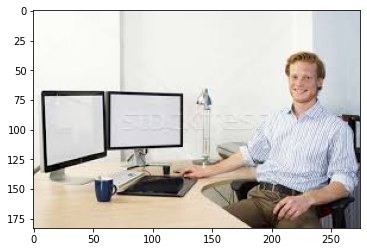

(183, 275, 3)

In [ ]:
img = io.imread(os.path.join('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/Predict_new_Images/popo99.jpg'))
plt.imshow(img)
plt.show()
img.shape

## Voila!! Correct prediction. This is on a human image that the model has never seen. The human images the model is seen is that of horse riders in their horse riding attires. This is an image of a human in office along with his computers

## Save the model and weights of custom_resnet_model2 for future use

In [ ]:
custom_resnet_model2.save('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/FourClass_TransferL.h5')
custom_resnet_model2.save_weights('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/FourClass_TransferL_weights.h5')

## Load the model and the weights

In [ ]:
from tensorflow import keras
model1 = keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/FourClass_TransferL.h5')
model1.summary()

Model: "functional_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
#The pre-trained weights must exist in the current folder
model1.load_weights('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/FourClass_TransferL_weights.h5')

In [ ]:
img = image.load_img('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/Predict_new_Images/Pic2.PNG', target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x=preprocess_input(x)
x.shape

(224, 224, 3)
(1, 224, 224, 3)


(1, 224, 224, 3)

In [ ]:
features = custom_resnet_model2.predict(x)
print( "Actual class is: ",np.argmax(features))

Actual class is:  2


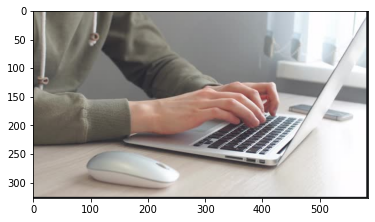

(327, 585, 4)

In [ ]:
img = io.imread(os.path.join('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/Predict_new_Images/Pic2.PNG'))
plt.imshow(img)
plt.show()
img.shape

## This is extra ordinary!!! The new image is not even a full image of a man. It just shows the hands and a laptop

In [ ]:
model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.9500


[0.2690661549568176, 0.949999988079071]

### Let's experiment for fun with parsing an image of both dog and cat together and see what the model classifies it as. The model is not trained on these kind of images and hence a wrong prediction is highly likely

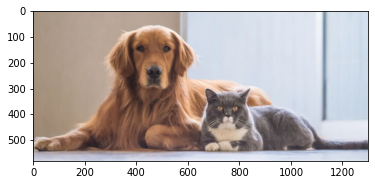

(581, 1299, 3)

In [ ]:
img = io.imread(os.path.join('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/Predict_new_Images/Dog_Cat.JPG'))
plt.imshow(img)
plt.show()
img.shape

In [ ]:
img = image.load_img('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/Predict_new_Images/Dog_Cat.JPG', target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x=preprocess_input(x)
x.shape

features = custom_resnet_model2.predict(x)
print( "Actual class is: ",np.argmax(features))

(224, 224, 3)
(1, 224, 224, 3)
Actual class is:  3


### Here you go! A wrong prediction. It is predicted as a horse. These kind of problems require another solution i.e. Instance segmentation/Semantic Segmentation where the model identifies each object in the picture and then classifies them.

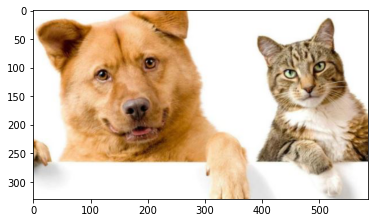

(330, 586, 3)

In [ ]:
img = io.imread(os.path.join('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/Predict_new_Images/Do_Cat2.JPG'))
plt.imshow(img)
plt.show()
img.shape

## ### Let's experiment with one more example of parsing an image of both dog and cat together and see what the model classifies it as. The model is not trained on these kind of images and hence a wrong prediction is highly likely

In [ ]:
img = image.load_img('/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/Transfer Learning/Predict_new_Images/Do_Cat2.JPG', target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x=preprocess_input(x)

features = custom_resnet_model2.predict(x)
print( "Actual class is: ",np.argmax(features))

Actual class is:  1


# Predicted as cat